# Обработка и визуализация данных по индексам

Мы выгрузили данные с [Нью-Йоркской биржи](https://ru.tradingview.com/) по индексам

Признаки:

* Время - данные по минутам
* open, high, low, clouse - характеристики минутных цен. Цена открытия минуты, максимальрная цена, наименьшая цена и цена закрытия минуты
* Объемы

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from math import *
import glob
from IPython.display import display
# from scipy.linalg import block_diag

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Сливаем таблицы в один дата фрейм
names = glob.glob(r'/content/drive/MyDrive/Андан Проект/Данные индексов/*.csv',\
                  recursive=True)
ticker_names = [x.replace('.csv', '').split()[-1] for x in names]
merged = pd.read_csv(names[0])
merged = merged.rename(str.lower, axis=1).rename(columns={' ime': 'time',\
                                                 'open': f'open_{ticker_names[0]}',\
                                                 'high': f'high_{ticker_names[0]}',\
                                                 'low': f'low_{ticker_names[0]}',\
                                                 'close': f'close_{ticker_names[0]}',\
                                                 'volume': f'volume_{ticker_names[0]}',\
                                                 })
for i in range(1, len(names)):
    df = pd.read_csv(names[i])
    df = df.rename(str.lower, axis=1).rename(columns={' ime': 'time',\
                                                 'open': f'open_{ticker_names[i]}',\
                                                 'high': f'high_{ticker_names[i]}',\
                                                 'low': f'low_{ticker_names[i]}',\
                                                 'close': f'close_{ticker_names[i]}',\
                                                 'volume': f'volume_{ticker_names[i]}',\
                                                 })
    merged = merged.merge(df, on='time')
    df_indexes = merged

In [ ]:
print(names[0])

/content/drive/MyDrive/Андан Проект/Данные индексов/Прошлые данные по QQQ.csv


In [ ]:
df_indexes['time'] = pd.to_datetime(df_indexes['time'])

In [ ]:
# Добавляем новый признак логарифмическая доходность за минуту
for ticker_name in ticker_names:
    df_indexes[f'log_return_{ticker_name}'] = np.log(df_indexes[f'open_{ticker_name}'].shift(1) / \
    df_indexes[f'open_{ticker_name}'])

In [ ]:
# Провальная попытка сделать матрично
# n, d = 390, 13
# blocks = [np.ones((n, n)) * 1/n] * d
# day_mean_matrix = block_diag(*blocks)[1:, :]
# for ticker_name in ticker_names:
#     np_mean_day_log_return = day_mean_matrix @ df_indexes[f'log_return_{ticker_name}'].to_numpy()
#     print(np_mean_day_log_return)
#     df_indexes[f'mean_day_log_return_{ticker_name}'] = pd.DataFrame(np_mean_day_log_return)

In [ ]:
# Добавляем новый признак годовая волатильность
# 252 - торовых дня в году; 6.5 - торговых часов в день; 60 - минут в часе
for ticker_name in ticker_names:
    df_indexes[f'std_log_return_{ticker_name}'] = df_indexes[f'log_return_{ticker_name}'].std() * np.sqrt(252 * 6.5 * 60)
df_indexes

,time,open_QQQ,high_QQQ,low_QQQ,close_QQQ,volume_QQQ,open_SPY,high_SPY,low_SPY,close_SPY,...,high_SPX,low_SPX,close_SPX,volume_SPX,log_return_QQQ,log_return_SPY,log_return_SPX,std_log_return_QQQ,std_log_return_SPY,std_log_return_SPX
0,2025-02-03 09:30:00,513.47,513.54,512.58,513.280,85501,592.67,592.92,591.92,592.86,...,5948.14,5937.49,5943.86,156821116,NaN,NaN,NaN,0.142735,0.10793,0.103305
1,2025-02-03 09:31:00,513.22,513.88,512.98,513.810,37627,592.91,593.36,592.72,593.32,...,5950.94,5944.50,5950.84,16252045,0.000487,-0.000405,0.000605,0.142735,0.10793,0.103305
2,2025-02-03 09:32:00,513.90,514.39,513.65,514.020,34127,593.34,594.06,593.34,593.87,...,5958.20,5950.68,5957.25,16231682,-0.001324,-0.000725,-0.001032,0.142735,0.10793,0.103305
3,2025-02-03 09:33:00,514.03,514.25,513.52,513.620,31471,593.89,594.13,593.43,593.61,...,5958.67,5952.60,5953.87,14275633,-0.000253,-0.000927,-0.001172,0.142735,0.10793,0.103305
4,2025-02-03 09:34:00,513.55,513.89,513.27,513.660,31860,593.61,593.85,593.18,593.54,...,5956.21,5951.07,5953.46,14437487,0.000934,0.000472,0.000651,0.142735,0.10793,0.103305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5065,2025-02-20 15:55:00,536.81,536.94,536.55,536.900,18496,610.27,610.39,610.05,610.37,...,6117.86,6114.69,6117.76,26036470,-0.000373,-0.000180,0.000047,0.142735,0.10793,0.103305
5066,2025-02-20 15:56:00,536.90,537.04,536.89,536.980,21429,610.34,610.40,610.25,610.30,...,6117.96,6116.58,6117.08,25601050,-0.000168,-0.000115,-0.000392,0.142735,0.10793,0.103305
5067,2025-02-20 15:57:00,536.96,537.11,536.96,537.060,37781,610.28,610.44,610.27,610.41,...,6118.47,6117.00,6118.31,26440500,-0.000112,0.000098,0.000105,0.142735,0.10793,0.103305
5068,2025-02-20 15:58:00,537.08,537.19,537.06,537.185,38873,610.40,610.50,610.36,610.48,...,6119.20,6118.23,6119.08,34914610,-0.000223,-0.000197,-0.000204,0.142735,0.10793,0.103305


In [ ]:
df_dict = {}
columns = list(df_indexes.columns)
for ticker in ticker_names:
    df_dict[ticker] = df_indexes[['time'] + [item for item in columns if item.split('_')[-1] == ticker]].copy()

In [ ]:
our_colors = ['#F3E8FF', '#DCFCE7', '#FFEDD5', '#9333EA', '#16A34A', '#EA580C']

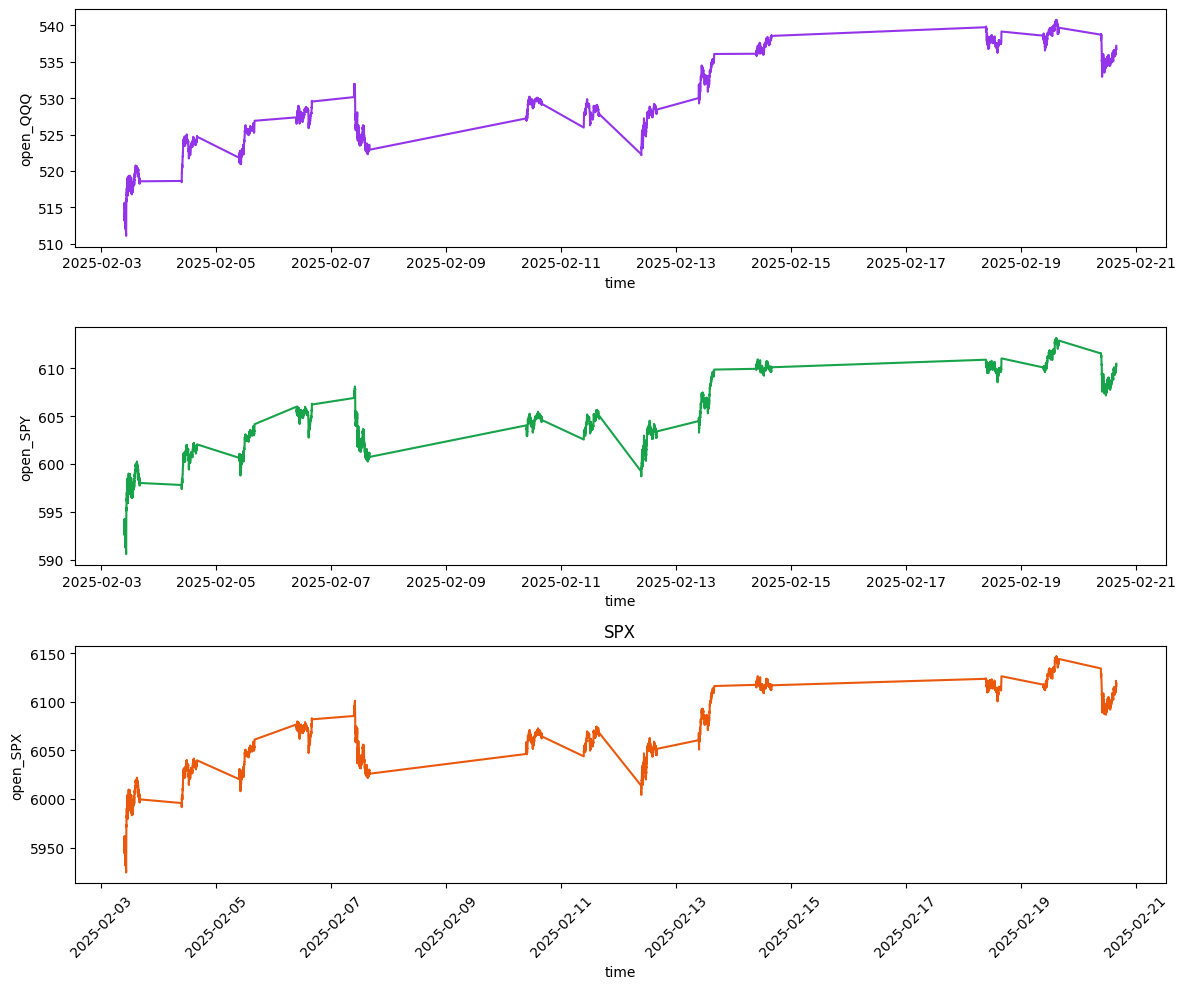

In [ ]:
# Построим временной ряд значений индексов
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
for i, ticker in enumerate(ticker_names):
    sns.lineplot(x='time',
                 y=f'open_{ticker}',
                 data=df_dict[ticker],
                 ax=axes[i],
                 color=our_colors[i+3])
axes[i].tick_params(axis='x', rotation=45)
axes[i].set_title(ticker)
plt.tight_layout()
plt.show()

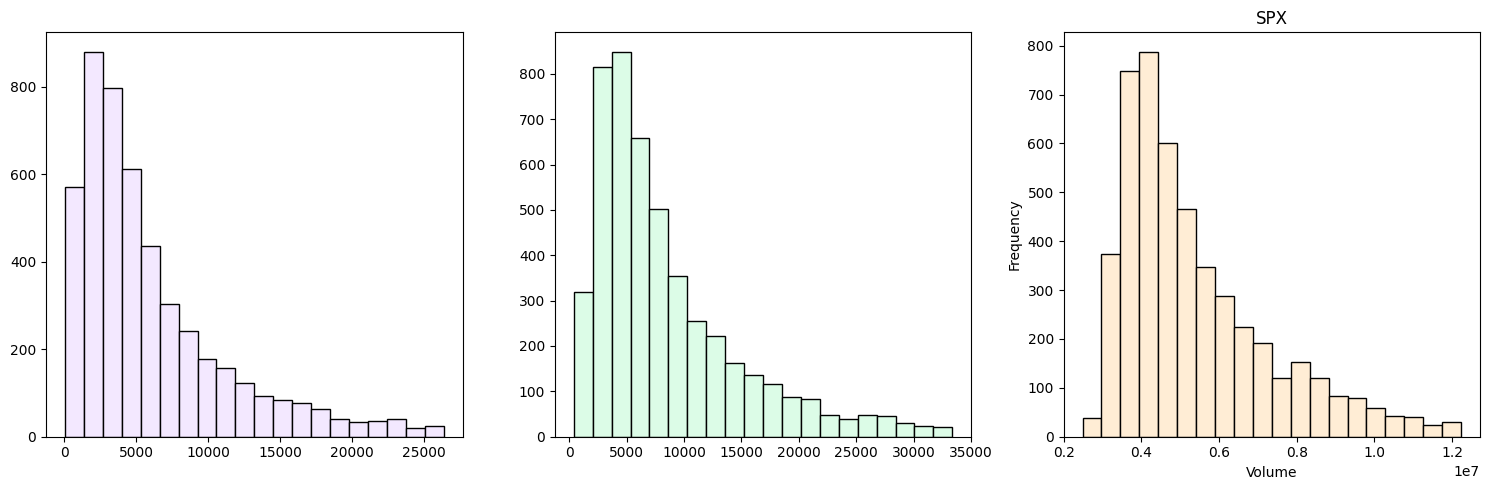

In [ ]:
# Построим распределение объемов по индексам
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ticker in enumerate(ticker_names):
    axes[i].hist(df_dict[ticker][df_dict[ticker][f'volume_{ticker}'] <
                                 df_dict[ticker][f'volume_{ticker}'].quantile(0.95)][f'volume_{ticker}'],
                 bins=20,
                 edgecolor='black',
                 color=our_colors[i])
axes[i].set_title(ticker)
axes[i].set_xlabel('Volume')
axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
path = r'/content/drive/MyDrive/Андан Проект/Обработанные данные/'
for ticker in ticker_names:
    df_dict[ticker].to_excel(path + f'Index_{ticker}.xlsx', index=False)